# Proyecto End to End de Machine Learning

## Tema: Predicción de consumo de Millas por Galón (MPG)

## Dataset: Auto MPG

Este conjunto de datos es una versión ligeramente modificada del conjunto de datos proporcionado en la biblioteca StatLib. En línea con el uso de Ross Quinlan (1993) para predecir el atributo "mpg", se eliminaron 8 de las instancias originales porque tenían valores desconocidos para el atributo "mpg". El conjunto de datos original está disponible en el archivo "auto-mpg.data-original". "Los datos se refieren al consumo de combustible en ciclo urbano en millas por galón, que se predecirá en términos de 3 atributos discretos multivalor y 5 atributos continuos". (Quinlan, 1993)

|Variable_Name |	Role|	Type|	Description|	Units|	Missing_Values|
|--|--|--|--|--|--|
|displacement |	Feature|	Continuous|			| |no|
|mpg |	Target|	Continuous|			| |no|
|cylinders |	Feature|	Integer|			| |no|
|horsepower |	Feature|	Continuous| | |yes|
|weight |	Feature|	Continuous|			| |no|
|acceleration |	Feature|	Continuous|			| |no|
|model_year |	Feature|	Integer|			| |no|
|origin |	Feature|	Integer|			| |no|
|car_name |	ID|	Categorical|			| |no|

-------------------

## Librerías

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
import shap
import lime
from lime import lime_tabular
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
warnings.filterwarnings('ignore')

### Configuración para visualizaciones

In [63]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

## Carga del dataset

In [64]:
print("="*50)
print("CARGA DEL DATASET")
print("="*50)

# Cargamos el dataset Auto MPG
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
nombres_columnas = ["mpg", "cilindros", "cilindrada", "caballos_fuerza",
                    "peso", "aceleracion", "anio_modelo", "origen", "nombre_auto"]

datos = pd.read_csv(url, names=nombres_columnas, na_values='?',
                  comment='\t', delim_whitespace=True)

CARGA DEL DATASET


In [65]:
datos.head()

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,anio_modelo,origen,nombre_auto
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [66]:
df = datos.copy()

### Primera Observación

In [67]:
print("\n" + "="*50)
print("PRIMERA OBSERVACIÓN DE LOS DATOS")
print("="*50)

# Mostramos las primeras filas y la información del dataset
print("\nPrimeras 5 filas del dataset:")
print(df.head())

print("\nÚltimas 5 filas del dataset:")
print(df.tail())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas Numéricas:")
print(df.describe())

print("\nEstadísticas descriptivas Categóricas:")
print(df.describe(include='object'))

print("\nValores faltantes por columna:")
print(df.isnull().sum())

print("\nFilas duplicadas:")
print(df.duplicated().sum())


PRIMERA OBSERVACIÓN DE LOS DATOS

Primeras 5 filas del dataset:
    mpg  cilindros  cilindrada  caballos_fuerza    peso  aceleracion  \
0  18.0          8       307.0            130.0  3504.0         12.0   
1  15.0          8       350.0            165.0  3693.0         11.5   
2  18.0          8       318.0            150.0  3436.0         11.0   
3  16.0          8       304.0            150.0  3433.0         12.0   
4  17.0          8       302.0            140.0  3449.0         10.5   

   anio_modelo  origen                nombre_auto  
0           70       1  chevrolet chevelle malibu  
1           70       1          buick skylark 320  
2           70       1         plymouth satellite  
3           70       1              amc rebel sst  
4           70       1                ford torino  

Últimas 5 filas del dataset:
      mpg  cilindros  cilindrada  caballos_fuerza    peso  aceleracion  \
393  27.0          4       140.0             86.0  2790.0         15.6   
394  44.0   

### Conclusiones

## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [68]:
print("\n" + "="*50)
print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*50)


ANÁLISIS EXPLORATORIO DE DATOS (EDA)


In [69]:
df['origen'] = df['origen'].map({1: 'USA', 2: 'Europa', 3: 'Asia'})

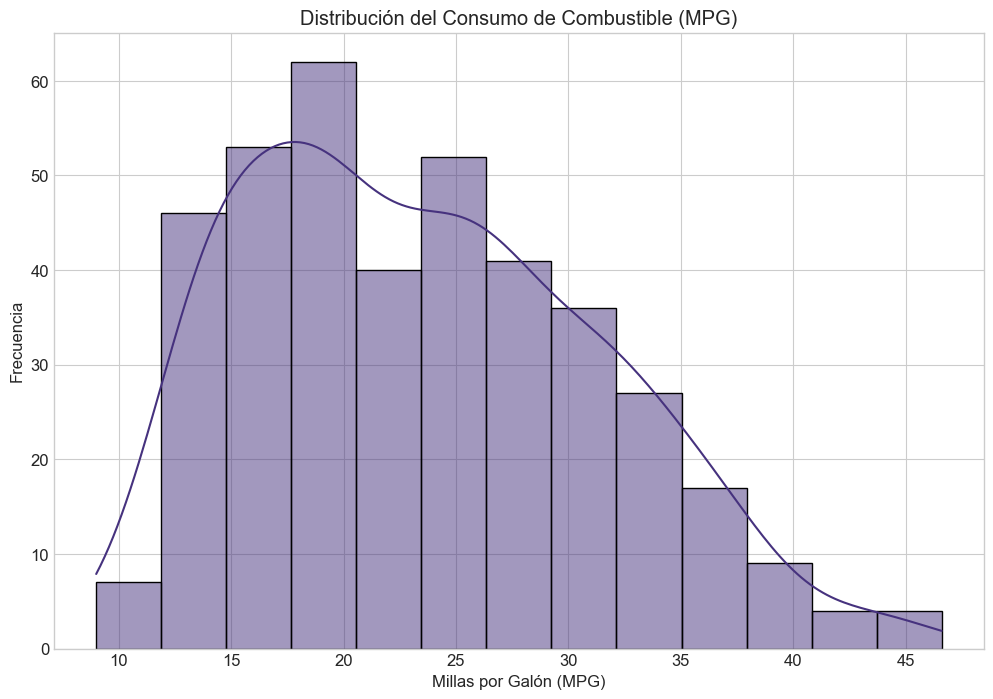

In [70]:
sns.histplot(df['mpg'], kde=True)
plt.title('Distribución del Consumo de Combustible (MPG)')
plt.xlabel('Millas por Galón (MPG)')
plt.ylabel('Frecuencia')
plt.show();

### Conclusiones

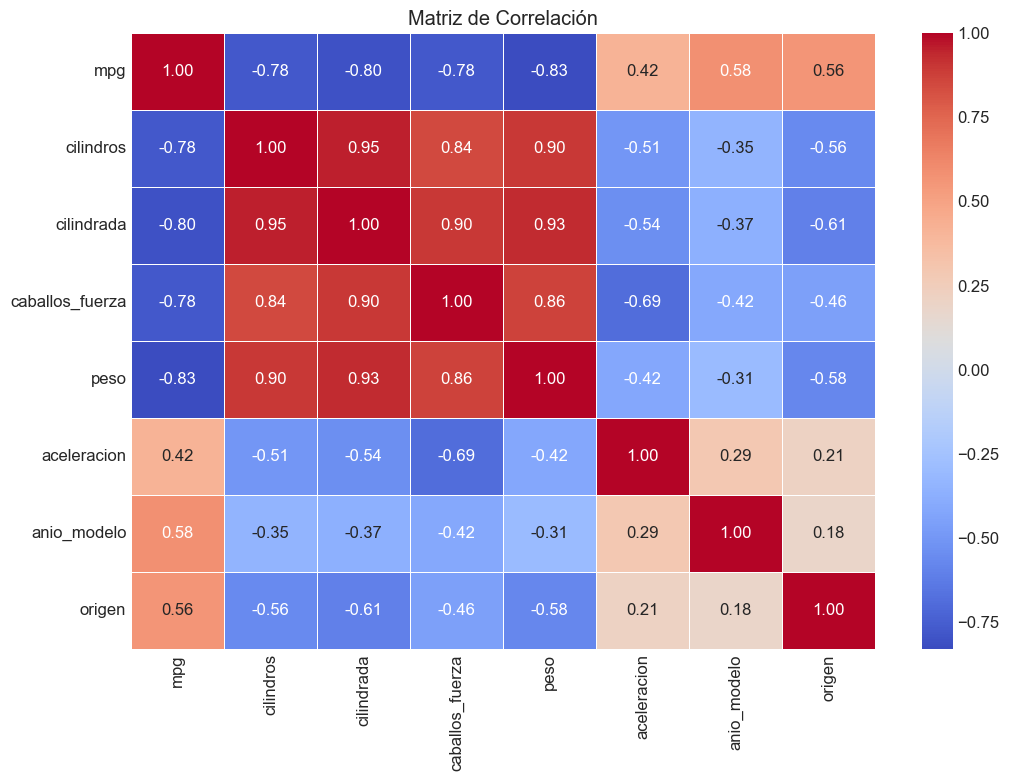

In [71]:
columnas_numericas = datos.select_dtypes(include=['float64', 'int64']).columns
matriz_corr = datos[columnas_numericas].corr()
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación');

### Conclusiones

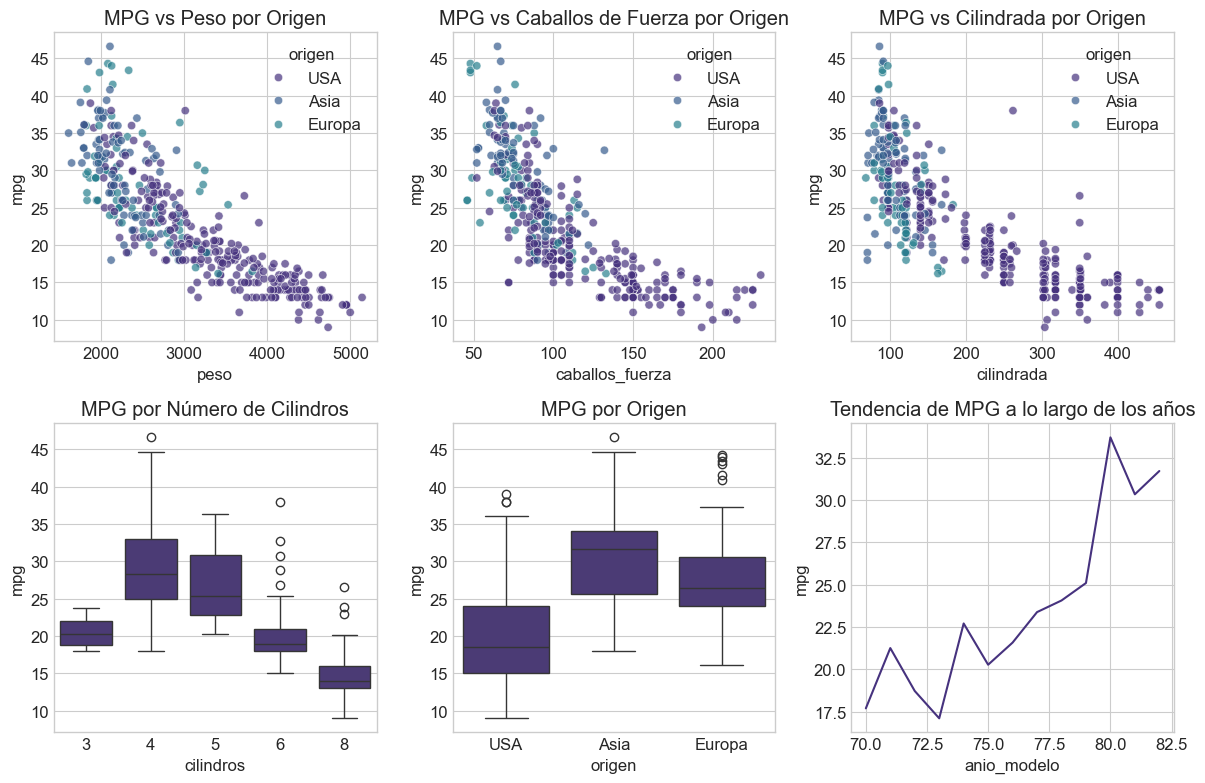

In [72]:
plt.subplot(2, 3, 1)
sns.scatterplot(x='peso', y='mpg', data=df, hue='origen', alpha=0.7)
plt.title('MPG vs Peso por Origen')

plt.subplot(2, 3, 2)
sns.scatterplot(x='caballos_fuerza', y='mpg', data=df, hue='origen', alpha=0.7)
plt.title('MPG vs Caballos de Fuerza por Origen')

plt.subplot(2, 3, 3)
sns.scatterplot(x='cilindrada', y='mpg', data=df, hue='origen', alpha=0.7)
plt.title('MPG vs Cilindrada por Origen')

plt.subplot(2, 3, 4)
sns.boxplot(x='cilindros', y='mpg', data=df)
plt.title('MPG por Número de Cilindros')

plt.subplot(2, 3, 5)
sns.boxplot(x='origen', y='mpg', data=df)
plt.title('MPG por Origen')

plt.subplot(2, 3, 6)
sns.lineplot(x='anio_modelo', y='mpg', data=df, estimator='mean', ci=None)
plt.title('Tendencia de MPG a lo largo de los años')

plt.tight_layout()
plt.show()

### Conclusiones

In [73]:
print("\nObservaciones del EDA:")
print("- Existe una fuerte correlación negativa entre MPG y variables como peso, cilindrada y caballos de fuerza.")
print("- Los vehículos asiáticos tienden a tener mejor rendimiento de combustible.")
print("- El consumo de combustible mejoró con los años, especialmente después de 1975.")
print("- Los vehículos con menos cilindros generalmente tienen mejor rendimiento de combustible.")


Observaciones del EDA:
- Existe una fuerte correlación negativa entre MPG y variables como peso, cilindrada y caballos de fuerza.
- Los vehículos asiáticos tienden a tener mejor rendimiento de combustible.
- El consumo de combustible mejoró con los años, especialmente después de 1975.
- Los vehículos con menos cilindros generalmente tienen mejor rendimiento de combustible.


## Feature Engineering

In [74]:
print("\n" + "="*50)
print("Feature Engineering")
print("="*50)


Feature Engineering


In [75]:
df['caballos_fuerza'] = (
    pd.to_numeric(df['caballos_fuerza'], errors='coerce'))

print(f"Valores nulos en caballos_fuerza antes de imputación: {df['caballos_fuerza'].isnull().sum()}")

Valores nulos en caballos_fuerza antes de imputación: 6


In [76]:
df[df['caballos_fuerza'].isna()]

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,anio_modelo,origen,nombre_auto
32,25.0,4,98.0,NaN,2046.0,19.0,71,USA,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,USA,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,Europa,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,USA,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,Europa,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,USA,amc concord dl


In [77]:
# Imputamos con la mediana
df['caballos_fuerza'] = df['caballos_fuerza'].fillna(
    df['caballos_fuerza'].median()) #TODO Imputar por cilindros y origen

In [78]:
print(f"Valores nulos después de imputación: {df['caballos_fuerza'].isnull().sum()}")

Valores nulos después de imputación: 0


In [79]:
print("\nCreando nuevas características...")


Creando nuevas características...


In [80]:
# Relación peso/potencia (menor valor indica mejor rendimiento)
df['relacion_peso_potencia'] = df['peso'] / df['caballos_fuerza']

# Eficiencia del motor (cilindrada por cilindro)
df['cilindrada_por_cilindro'] = df['cilindrada'] / df['cilindros']

# Década del modelo
df['decada'] = (df['anio_modelo'] // 10) * 10

# Categoría de potencia
df['categoria_potencia'] = pd.qcut(df['caballos_fuerza'], 4,
                                              labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])

# Categoría de peso
df['categoria_peso'] = pd.qcut(df['peso'], 4,
                                          labels=['Ligero', 'Medio-Ligero', 'Medio-Pesado', 'Pesado'])

# One-hot encoding para variables categóricas
df = pd.get_dummies(df, columns=['origen', 'categoria_potencia', 'categoria_peso'],
                               drop_first=True, dtype=int)

print("\nNuevas características creadas:")
print(df.columns.tolist())

df #TODO separar nombre_auto en por lo menos marca y modelo


Nuevas características creadas:
['mpg', 'cilindros', 'cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'anio_modelo', 'nombre_auto', 'relacion_peso_potencia', 'cilindrada_por_cilindro', 'decada', 'origen_Europa', 'origen_USA', 'categoria_potencia_Media-Baja', 'categoria_potencia_Media-Alta', 'categoria_potencia_Alta', 'categoria_peso_Medio-Ligero', 'categoria_peso_Medio-Pesado', 'categoria_peso_Pesado']


,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,anio_modelo,nombre_auto,relacion_peso_potencia,cilindrada_por_cilindro,decada,origen_Europa,origen_USA,categoria_potencia_Media-Baja,categoria_potencia_Media-Alta,categoria_potencia_Alta,categoria_peso_Medio-Ligero,categoria_peso_Medio-Pesado,categoria_peso_Pesado
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,26.953846,38.375,70,0,1,0,0,1,0,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,22.381818,43.750,70,0,1,0,0,1,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,22.906667,39.750,70,0,1,0,0,1,0,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,22.886667,38.000,70,0,1,0,0,1,0,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,24.635714,37.750,70,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,32.441860,35.000,80,0,1,1,0,0,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,40.961538,24.250,80,1,0,0,0,0,0,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,27.321429,33.750,80,0,1,1,0,0,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,33.227848,30.000,80,0,1,1,0,0,1,0,0


### Conclusiones

## Feature Selection

In [81]:
print("\n" + "="*50)
print("SELECCIÓN DE CARACTERÍSTICAS")
print("="*50)


SELECCIÓN DE CARACTERÍSTICAS


In [82]:
# Preparamos los datos para la selección de características
X = df.drop(['mpg', 'nombre_auto', 'anio_modelo'], axis=1)  # Eliminamos la variable objetivo y variables no útiles
y = df['mpg']

In [83]:
# Método 1: Correlación con la variable objetivo
correlaciones = X.corrwith(y).abs().sort_values(ascending=False)
print("\nCorrelación de las características con MPG:")
print(correlaciones.head(10))


Correlación de las características con MPG:
peso                       0.831741
cilindrada                 0.804203
cilindros                  0.775396
caballos_fuerza            0.773453
cilindrada_por_cilindro    0.773363
categoria_peso_Pesado      0.644248
categoria_potencia_Alta    0.643812
decada                     0.577124
origen_USA                 0.568192
aceleracion                0.420289
dtype: float64


In [84]:
# Método 2: SelectKBest con f_regression
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
mask = selector.get_support()
caracteristicas_seleccionadas = X.columns[mask]

print("\nCaracterísticas seleccionadas con SelectKBest:")
print(caracteristicas_seleccionadas.tolist())


Características seleccionadas con SelectKBest:
['cilindros', 'cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'cilindrada_por_cilindro', 'decada', 'origen_USA', 'categoria_potencia_Alta', 'categoria_peso_Pesado']



Importancia de características con Random Forest:
cilindrada                 0.292526
peso                       0.214358
cilindros                  0.206726
caballos_fuerza            0.102385
decada                     0.074356
aceleracion                0.029022
cilindrada_por_cilindro    0.027443
relacion_peso_potencia     0.025835
categoria_potencia_Alta    0.014660
origen_Europa              0.003939
dtype: float64


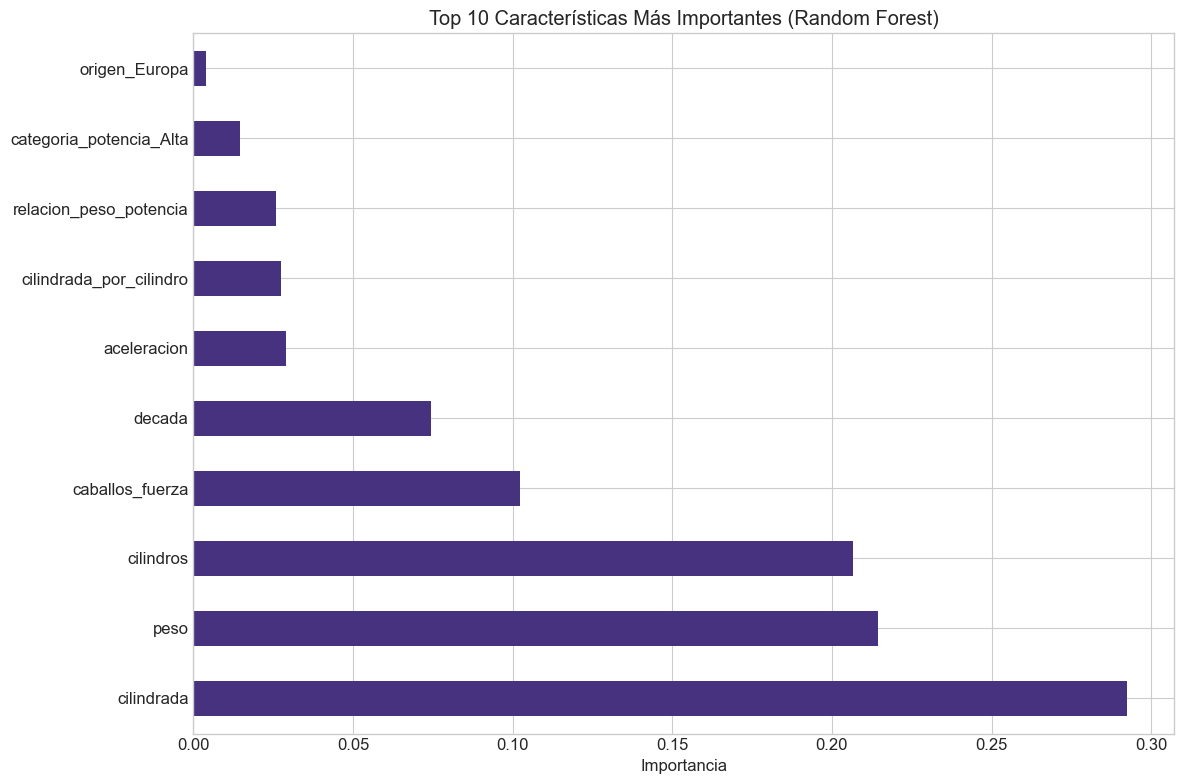

In [85]:
# Método 3: Importancia de características con Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nImportancia de características con Random Forest:")
print(importancias.head(10))

plt.figure(figsize=(12, 8))
importancias.head(10).plot(kind='barh')
plt.title('Top 10 Características Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()

In [86]:
# Seleccionamos las 10 características más importantes según Random Forest
X_selected = X[importancias.head(10).index]
print("\nDimensiones del conjunto de datos seleccionado:", X_selected.shape)


Dimensiones del conjunto de datos seleccionado: (398, 10)


### Conclusiones

## Reducción de Dimensionalidad

In [87]:
print("\n" + "="*50)
print("REDUCCIÓN DE DIMENSIONALIDAD")
print("="*50)


REDUCCIÓN DE DIMENSIONALIDAD


In [88]:
# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Aplicamos PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

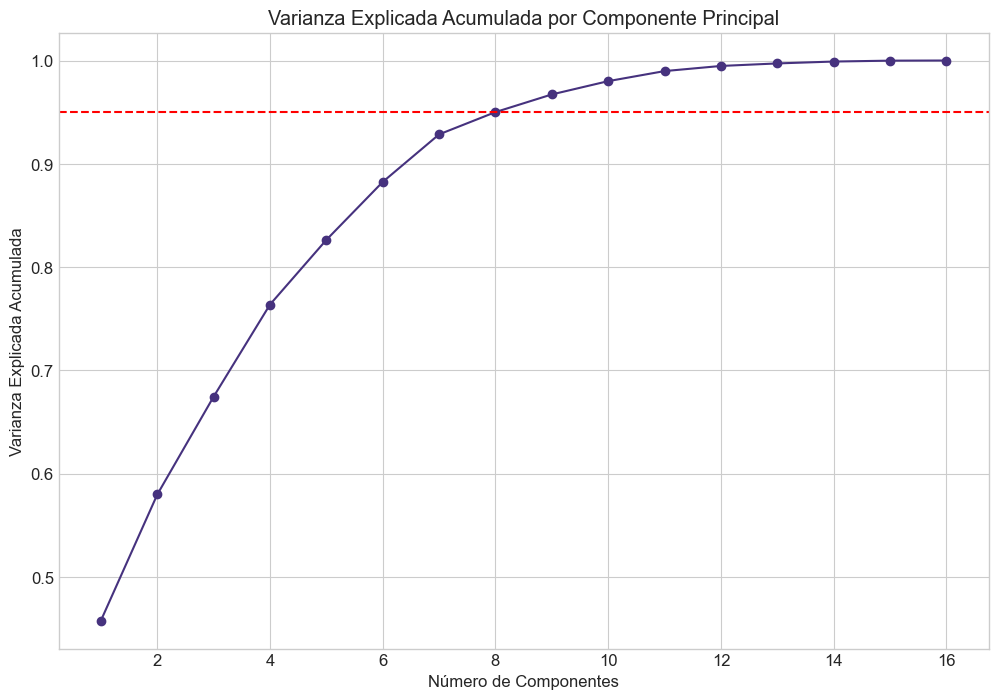

In [90]:
# Analizamos la varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal');

In [91]:
# Determinamos el número óptimo de componentes (95% de varianza)
n_componentes = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\nNúmero óptimo de componentes para explicar el 95% de la varianza: {n_componentes}")


Número óptimo de componentes para explicar el 95% de la varianza: 8


In [92]:
# Aplicamos PCA con el número óptimo de componentes
pca = PCA(n_components=n_componentes)
X_pca_reducido = pca.fit_transform(X_scaled)
print(f"Dimensiones después de PCA: {X_pca_reducido.shape}")

Dimensiones después de PCA: (398, 8)


### Conclusiones

## DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [93]:
print("\n" + "="*50)
print("DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA")
print("="*50)


DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #TODO Probar con todas las columnas y con as columnas del PCA
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")

Tamaño del conjunto de entrenamiento: (254, 10)
Tamaño del conjunto de prueba: (80, 10)
Tamaño del conjunto de validación: (64, 10)


## Base Line

In [95]:
print("\n" + "="*50)
print("ENTRENAMIENTO DE MODELOS BASE")
print("="*50)


ENTRENAMIENTO DE MODELOS BASE


In [96]:
from sklearn.dummy import DummyRegressor, DummyClassifier


# Modelo Dummy (Baseline)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

# Predicción
y_pred_dummy = dummy.predict(X_val)

# Evaluación con MAE
mae_dummy = mean_absolute_error(y_val, y_pred_dummy)
print(f"MAE del modelo baseline: {mae_dummy:.2f}")

# Evaluación con MSE
mse_dummy = mean_squared_error(y_val, y_pred_dummy)
print(f"MSE del modelo baseline: {mse_dummy:.2f}")

# Evaluación con RMSE
rmse_dummy = root_mean_squared_error(y_val, y_pred_dummy)
print(f"RMSE del modelo baseline: {rmse_dummy:.2f}")

# Evaluación con MAPE
mape_dummy = mean_absolute_percentage_error(y_val, y_pred_dummy)
print(f"MAPE del modelo baseline: {mape_dummy:.2f}")

MAE del modelo baseline: 7.02
MSE del modelo baseline: 69.87
RMSE del modelo baseline: 8.36
MAPE del modelo baseline: 0.33



Modelo: Regresión Lineal
RMSE CV: 3.4260
MSE val: 11.0818
RMSE val: 3.3289
MAE val: 2.5615
MAPE val: 0.1068
R² val: 0.8406

Modelo: Ridge
RMSE CV: 3.4195
MSE val: 11.0536
RMSE val: 3.3247
MAE val: 2.5660
MAPE val: 0.1072
R² val: 0.8410

Modelo: Lasso
RMSE CV: 3.5420
MSE val: 11.4234
RMSE val: 3.3798
MAE val: 2.6072
MAPE val: 0.1151
R² val: 0.8357



Modelo: Random Forest
RMSE CV: 3.5130
MSE val: 10.6741
RMSE val: 3.2671
MAE val: 2.4343
MAPE val: 0.0999
R² val: 0.8465

Modelo: Gradient Boosting
RMSE CV: 3.4748
MSE val: 9.8872
RMSE val: 3.1444
MAE val: 2.2914
MAPE val: 0.0939
R² val: 0.8578

Modelo: SVR
RMSE CV: 4.5652
MSE val: 22.2645
RMSE val: 4.7185
MAE val: 3.3688
MAPE val: 0.1342
R² val: 0.6798

Mejor modelo base: Gradient Boosting
R² en prueba: 0.8578
RMSE en prueba: 3.1444


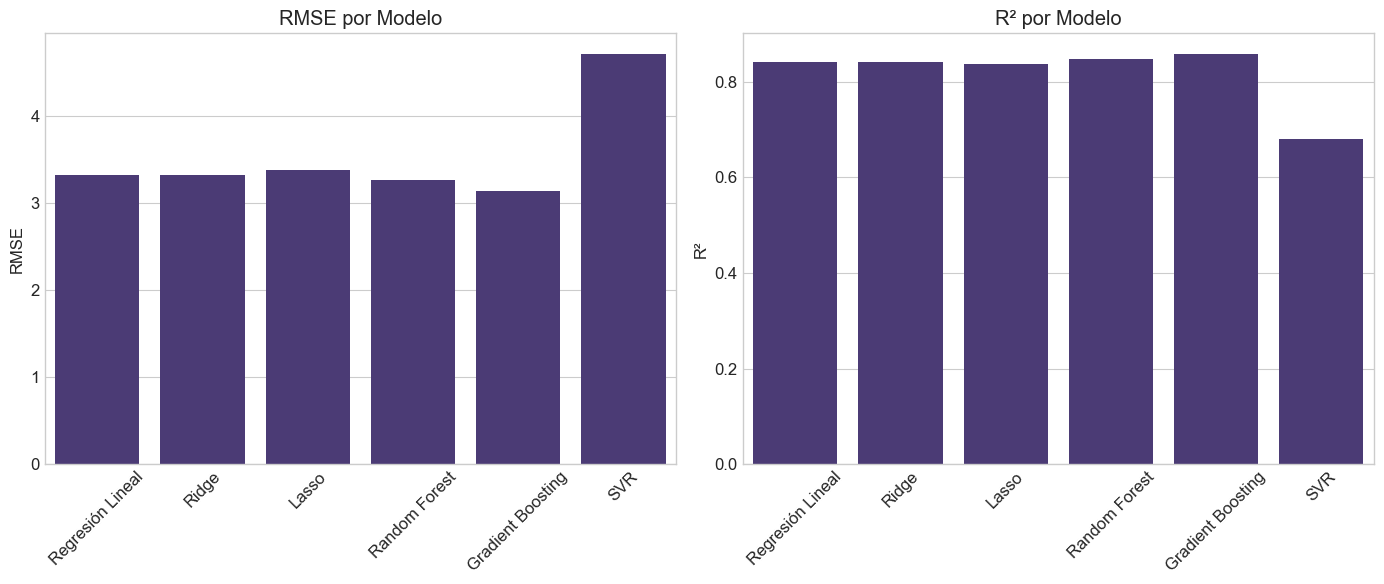

In [97]:
# Definimos los modelos a evaluar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    # 'XGBoost': XGBRegressor(random_state=42), #TODO: Incluir mas modelos
}

# Evaluamos cada modelo con validación cruzada
resultados = {}

for nombre, modelo in modelos.items():
    # Validación cruzada para MSE
    mse_cv = -cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(mse_cv)

    # Entrenamos el modelo con todos los datos de entrenamiento
    modelo.fit(X_train, y_train)

    # Evaluamos en el conjunto de prueba
    y_pred = modelo.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    resultados[nombre] = {
        'RMSE CV': rmse_cv.mean(),
        'MSE Val': mse,
        'RMSE Val': rmse,
        'MAE Val': mae,
        'MAPE Val': mape,
        'R² Val': r2,
        'Modelo': modelo
    }

    print(f"\nModelo: {nombre}")
    print(f"RMSE CV: {rmse_cv.mean():.4f}")
    print(f"MSE val: {mse:.4f}")
    print(f"RMSE val: {rmse:.4f}")
    print(f"MAE val: {mae:.4f}")
    print(f"MAPE val: {mape:.4f}")
    print(f"R² val: {r2:.4f}")

# Comparación visual de los modelos
modelos_nombres = list(resultados.keys())
rmse_valores = [resultados[modelo]['RMSE Val'] for modelo in modelos_nombres]
r2_valores = [resultados[modelo]['R² Val'] for modelo in modelos_nombres]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=modelos_nombres, y=rmse_valores)
plt.title('RMSE por Modelo')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=modelos_nombres, y=r2_valores)
plt.title('R² por Modelo')
plt.xticks(rotation=45)
plt.ylabel('R²')

plt.tight_layout();

# Identificamos el mejor modelo base según R²
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['R² Val'])
mejor_modelo = resultados[mejor_modelo_nombre]['Modelo']
print(f"\nMejor modelo base: {mejor_modelo_nombre}")
print(f"R² en prueba: {resultados[mejor_modelo_nombre]['R² Val']:.4f}")
print(f"RMSE en prueba: {resultados[mejor_modelo_nombre]['RMSE Val']:.4f}")

### Conclusiones

## ANÁLISIS NO SUPERVISADO Y PCA

In [98]:
print("\n" + "="*50)
print("ANÁLISIS NO SUPERVISADO Y PCA")
print("="*50)


ANÁLISIS NO SUPERVISADO Y PCA


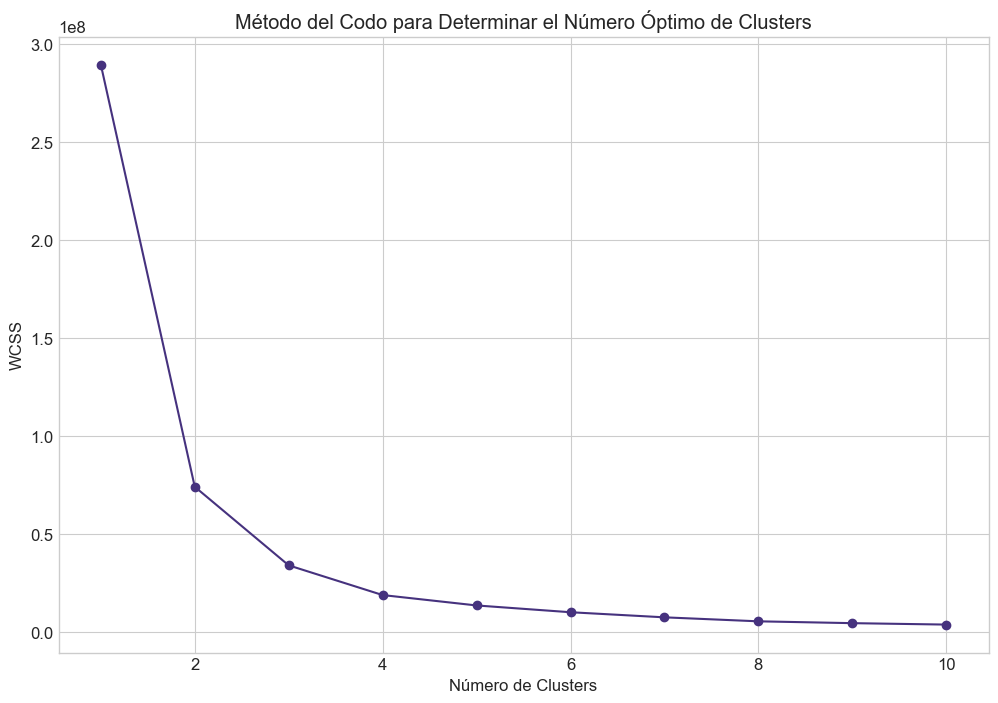

In [101]:
# Aplicamos K-means para segmentar los datos
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS');

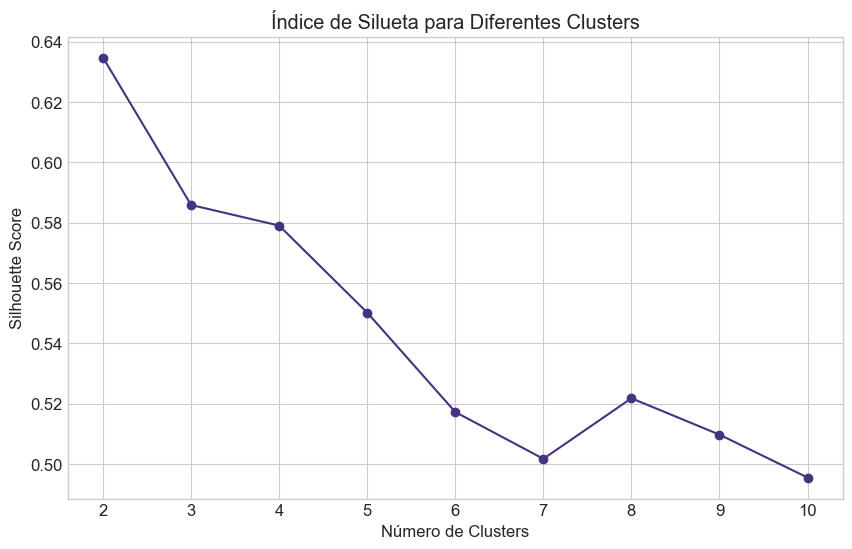

In [102]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_selected)
    silhouette_scores.append(silhouette_score(X_selected, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Índice de Silueta para Diferentes Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Número óptimo de clusters según Silhouette Score: 3


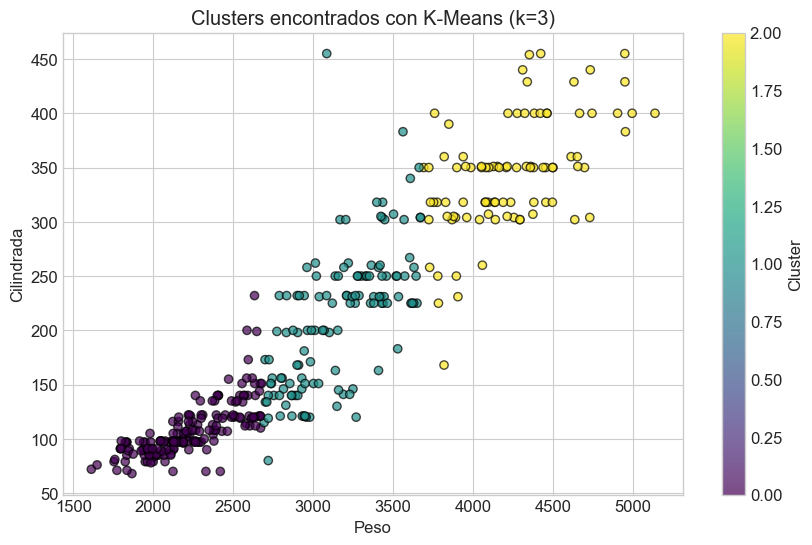

In [103]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 3  # +2 porque empezamos en k=2
print(f"Número óptimo de clusters según Silhouette Score: {optimal_k}")

# Entrenar modelo final
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_selected)

# Agregar etiquetas a los datos originales
df['Cluster'] = labels_final

# Visualizar dos dimensiones (por ejemplo, peso vs cilindrada)
plt.figure(figsize=(10, 6))
plt.scatter(datos['peso'], datos['cilindrada'], c=labels_final, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title(f"Clusters encontrados con K-Means (k={optimal_k})")
plt.xlabel("Peso")
plt.ylabel("Cilindrada")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

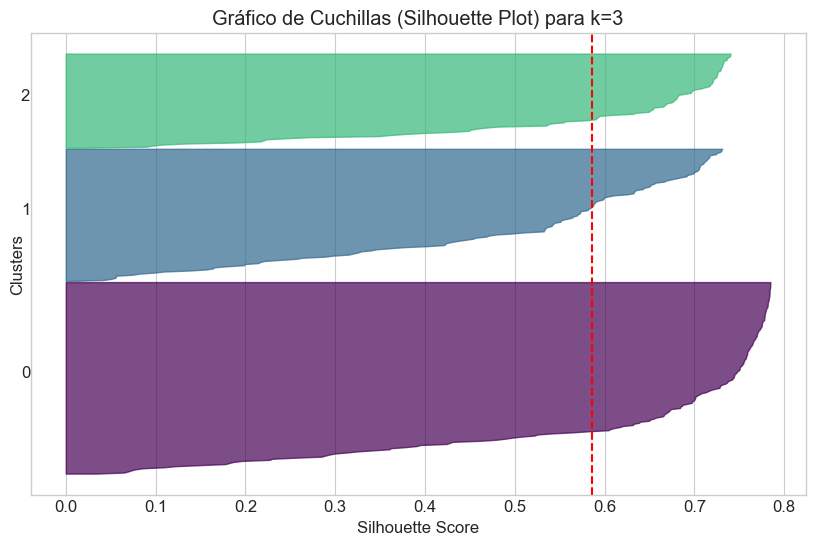

In [108]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette(X, n_clusters):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Entrenar modelo con el número óptimo de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcular valores de silueta por cada punto
    silhouette_vals = silhouette_samples(X, cluster_labels)
    
    y_lower, y_upper = 0, 0
    cmap = cm.get_cmap("viridis")
    
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        color = cmap(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
        y_lower = y_upper

    # Línea vertical con el promedio de la silueta
    avg_silhouette = silhouette_score(X, cluster_labels)
    ax.axvline(avg_silhouette, color="red", linestyle="--")

    ax.set_title(f'Gráfico de Cuchillas (Silhouette Plot) para k={n_clusters}')
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Clusters')
    ax.set_yticks([])
    plt.show()

# Graficamos el Silhouette Plot con el número óptimo de clusters
plot_silhouette(X_selected, 3)


In [109]:
n_clusters = 3  # Basado en el gráfico del codo

# Aplicamos K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_selected)

# Añadimos los clusters al dataframe original
datos_clusters = df.copy()
datos_clusters['cluster'] = clusters

In [110]:
# Visualizamos los clusters usando PCA para reducir a 2 dimensiones
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_selected)

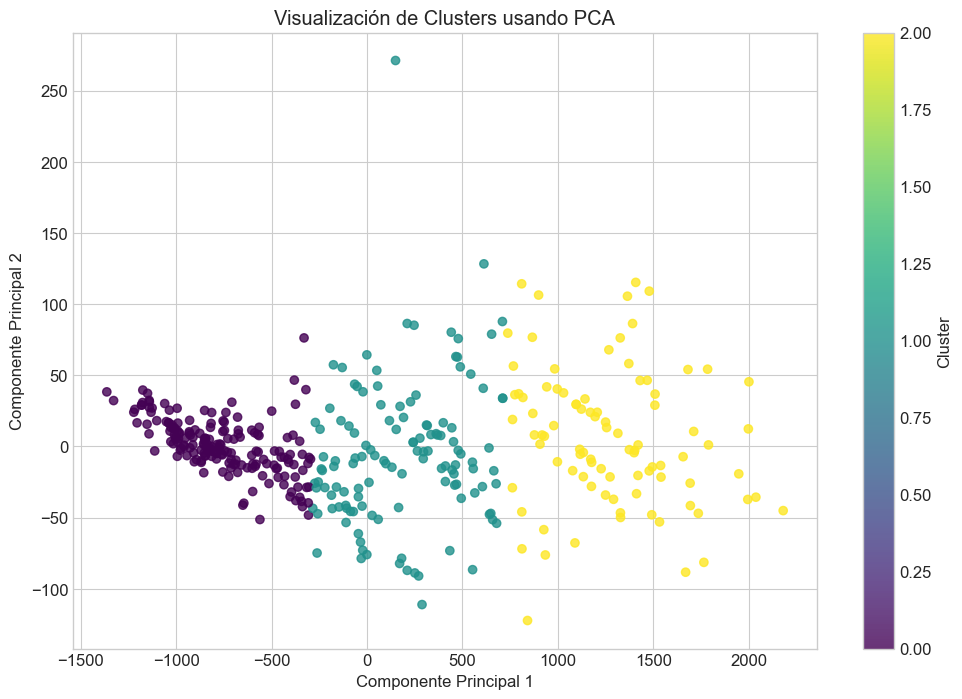

In [111]:
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster');

In [112]:
# Analizamos las características de cada cluster
print("\nEstadísticas por cluster:")
datos_clusters.groupby('cluster')[['mpg', 'peso', 'caballos_fuerza', 'cilindrada']].mean()


Estadísticas por cluster:


,mpg,peso,caballos_fuerza,cilindrada
cluster,,,,
0,29.751099,2217.670330,77.337912,106.953297
1,20.848413,3153.523810,105.035714,210.674603
2,14.635556,4236.322222,157.811111,344.144444


### Conclusiones

### Base line con cada cluster

In [113]:
datos_clusters[datos_clusters['Cluster']==0]

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,anio_modelo,nombre_auto,relacion_peso_potencia,cilindrada_por_cilindro,...,origen_Europa,origen_USA,categoria_potencia_Media-Baja,categoria_potencia_Media-Alta,categoria_potencia_Alta,categoria_peso_Medio-Ligero,categoria_peso_Medio-Pesado,categoria_peso_Pesado,Cluster,cluster
14,24.0,4,113.0,95.0,2372.0,15.0,70,toyota corona mark ii,24.968421,28.250000,...,0,0,0,1,0,1,0,0,0,0
17,21.0,6,200.0,85.0,2587.0,16.0,70,ford maverick,30.435294,33.333333,...,0,1,1,0,0,1,0,0,0,0
18,27.0,4,97.0,88.0,2130.0,14.5,70,datsun pl510,24.204545,24.250000,...,0,0,1,0,0,0,0,0,0,0
19,26.0,4,97.0,46.0,1835.0,20.5,70,volkswagen 1131 deluxe sedan,39.891304,24.250000,...,1,0,0,0,0,0,0,0,0,0
20,25.0,4,110.0,87.0,2672.0,17.5,70,peugeot 504,30.712644,27.500000,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,32.0,4,144.0,96.0,2665.0,13.9,82,toyota celica gt,27.760417,36.000000,...,0,0,0,1,0,1,0,0,0,0
391,36.0,4,135.0,84.0,2370.0,13.0,82,dodge charger 2.2,28.214286,33.750000,...,0,1,1,0,0,1,0,0,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,40.961538,24.250000,...,1,0,0,0,0,0,0,0,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,27.321429,33.750000,...,0,1,1,0,0,1,0,0,0,0


In [123]:
cluster_0 = datos_clusters[datos_clusters['Cluster']==0]

X = cluster_0.drop(columns=['mpg','anio_modelo','nombre_auto','Cluster','cluster'])
y = cluster_0['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #TODO Probar con todas las columnas y con as columnas del PCA
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de validación: {X_val.shape}")

Tamaño del conjunto de entrenamiento: (116, 16)
Tamaño del conjunto de prueba: (37, 16)
Tamaño del conjunto de validación: (29, 16)



Modelo: Regresión Lineal
RMSE CV: 3.3870
MSE val: 180.7674
RMSE val: 13.4450
MAE val: 7.3924
MAPE val: 0.3088
R² val: -3.4981

Modelo: Ridge
RMSE CV: 3.3583
MSE val: 172.7801
RMSE val: 13.1446
MAE val: 7.2734
MAPE val: 0.3034
R² val: -3.2994

Modelo: Lasso
RMSE CV: 3.7658
MSE val: 17.6560
RMSE val: 4.2019
MAE val: 3.3964
MAPE val: 0.1178
R² val: 0.5607

Modelo: Random Forest
RMSE CV: 3.6885
MSE val: 15.6616
RMSE val: 3.9575
MAE val: 3.1455
MAPE val: 0.1117
R² val: 0.6103

Modelo: Gradient Boosting
RMSE CV: 3.6158
MSE val: 16.9368
RMSE val: 4.1154
MAE val: 3.0013
MAPE val: 0.1043
R² val: 0.5786

Modelo: SVR
RMSE CV: 5.6098
MSE val: 33.5626
RMSE val: 5.7933
MAE val: 4.8374
MAPE val: 0.1681
R² val: 0.1648

Mejor modelo base: Random Forest
R² en prueba: 0.6103
RMSE en prueba: 3.9575


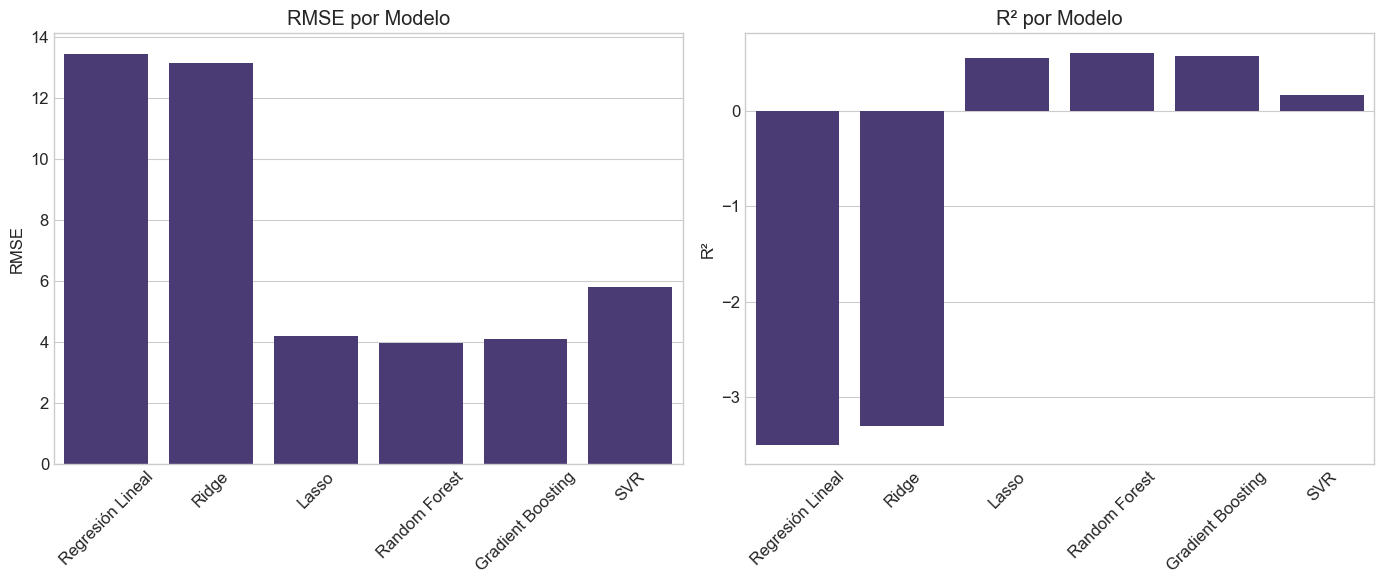

In [124]:
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    # 'XGBoost': XGBRegressor(random_state=42), #TODO: Incluir mas modelos
}

# Evaluamos cada modelo con validación cruzada
resultados = {}

for nombre, modelo in modelos.items():
    # Validación cruzada para MSE
    mse_cv = -cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(mse_cv)

    # Entrenamos el modelo con todos los datos de entrenamiento
    modelo.fit(X_train, y_train)

    # Evaluamos en el conjunto de prueba
    y_pred = modelo.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    resultados[nombre] = {
        'RMSE CV': rmse_cv.mean(),
        'MSE Val': mse,
        'RMSE Val': rmse,
        'MAE Val': mae,
        'MAPE Val': mape,
        'R² Val': r2,
        'Modelo': modelo
    }

    print(f"\nModelo: {nombre}")
    print(f"RMSE CV: {rmse_cv.mean():.4f}")
    print(f"MSE val: {mse:.4f}")
    print(f"RMSE val: {rmse:.4f}")
    print(f"MAE val: {mae:.4f}")
    print(f"MAPE val: {mape:.4f}")
    print(f"R² val: {r2:.4f}")

# Comparación visual de los modelos
modelos_nombres = list(resultados.keys())
rmse_valores = [resultados[modelo]['RMSE Val'] for modelo in modelos_nombres]
r2_valores = [resultados[modelo]['R² Val'] for modelo in modelos_nombres]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=modelos_nombres, y=rmse_valores)
plt.title('RMSE por Modelo')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x=modelos_nombres, y=r2_valores)
plt.title('R² por Modelo')
plt.xticks(rotation=45)
plt.ylabel('R²')

plt.tight_layout();

# Identificamos el mejor modelo base según R²
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['R² Val'])
mejor_modelo = resultados[mejor_modelo_nombre]['Modelo']
print(f"\nMejor modelo base: {mejor_modelo_nombre}")
print(f"R² en prueba: {resultados[mejor_modelo_nombre]['R² Val']:.4f}")
print(f"RMSE en prueba: {resultados[mejor_modelo_nombre]['RMSE Val']:.4f}")

## Optimización de hiperparámetros

In [126]:
print("\n" + "="*50)
print("OPTIMIZACIÓN DE HIPERPARÁMETROS")
print("="*50)


OPTIMIZACIÓN DE HIPERPARÁMETROS


In [133]:
# 11.1 Grid Search para Random Forest
if mejor_modelo_nombre == 'Random Forest':
    print("\nRealizando Grid Search para Random Forest...")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                              cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Mejor R² en validación cruzada: {grid_search.best_score_:.4f}")

    # Evaluamos el modelo optimizado
    mejor_rf = grid_search.best_estimator_
    y_pred_rf = mejor_rf.predict(X_val)
    rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
    r2_rf = r2_score(y_val, y_pred_rf)

    print(f"RMSE del modelo optimizado: {rmse_rf:.4f}")
    print(f"R² del modelo optimizado: {r2_rf:.4f}")

    mejor_modelo = mejor_rf


Realizando Grid Search para Random Forest...
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mejor R² en validación cruzada: 0.5951
RMSE del modelo optimizado: 4.0492
R² del modelo optimizado: 0.5920


In [134]:
# 11.2 Optimización Bayesiana para Gradient Boosting

print("\nRealizando Optimización Bayesiana para Gradient Boosting...")
param_space = {
    'n_estimators': Integer(50, 300),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'subsample': Real(0.6, 1.0)
}

bayes_search = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_space,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print(f"Mejores parámetros: {bayes_search.best_params_}")
print(f"Mejor R² en validación cruzada: {bayes_search.best_score_:.4f}")

# Evaluamos el modelo optimizado
mejor_gb = bayes_search.best_estimator_
y_pred_gb = mejor_gb.predict(X_val)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)

print(f"RMSE del modelo optimizado: {rmse_gb:.4f}")
print(f"R² del modelo optimizado: {r2_gb:.4f}")

mejor_modelo = mejor_gb


Realizando Optimización Bayesiana para Gradient Boosting...
Mejores parámetros: OrderedDict([('learning_rate', 0.039933693292112146), ('max_depth', 10), ('min_samples_leaf', 3), ('min_samples_split', 16), ('n_estimators', 164), ('subsample', 0.8882379233888056)])
Mejor R² en validación cruzada: 0.6104
RMSE del modelo optimizado: 3.9369
R² del modelo optimizado: 0.6143


### Conclusiones

## INFERENCIA

In [132]:
print("\n" + "="*50)
print("INFERENCIA")
print("="*50)


INFERENCIA


Métricas finales del mejor modelo:
RMSE: 4.0677
MAE: 2.9506
R²: 0.4124


Text(0.5, 1.0, 'Comparación de ValoresX_scaled, y_scaledeales vs Predichos')

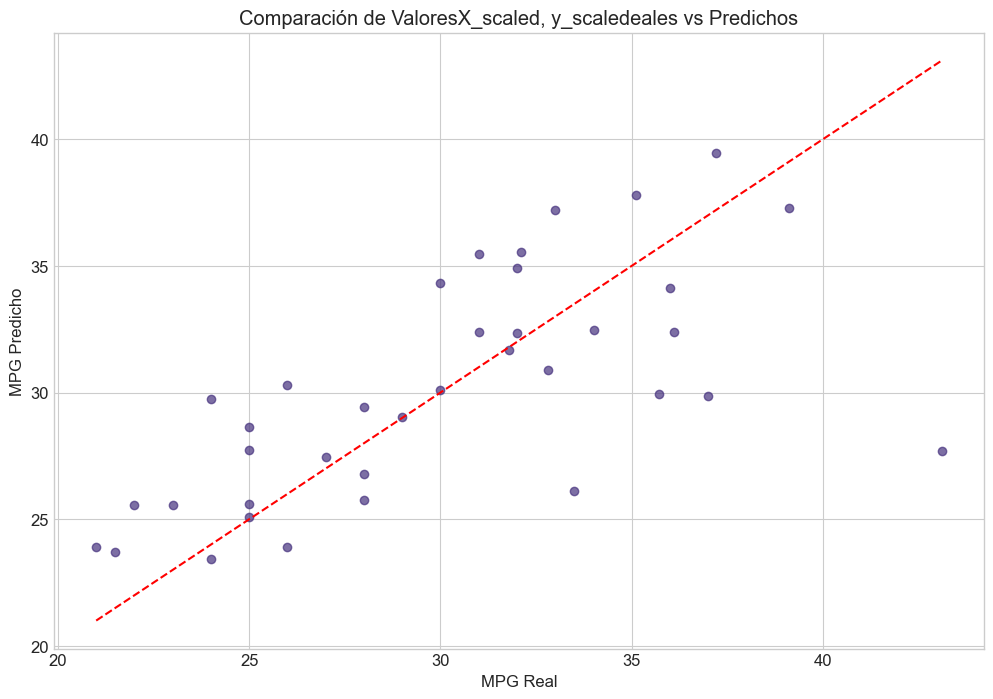

In [135]:
# Realizamos predicciones con el mejor modelo optimizado
y_pred_final = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento
rmse_final = root_mean_squared_error(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Métricas finales del mejor modelo:")
print(f"RMSE: {rmse_final:.4f}")
print(f"MAE: {mae_final:.4f}")
print(f"R²: {r2_final:.4f}")

# Visualizamos las predicciones vs valores reales
plt.scatter(y_test, y_pred_final, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('MPG Real')
plt.ylabel('MPG Predicho')
plt.title('Comparación de ValoresX_scaled, y_scaledeales vs Predichos')

Text(0.5, 1.0, 'Gráfico de Residuos')

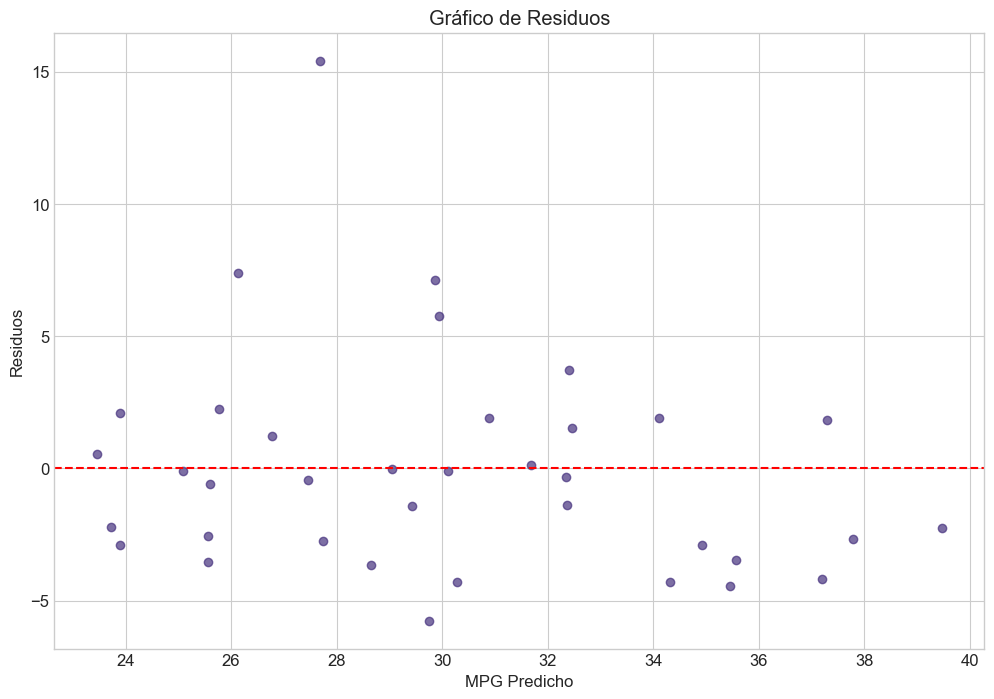

In [ ]:
# Visualizamos los residuos
residuos = y_test - y_pred_final

plt.scatter(y_pred_final, residuos, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('MPG Predicho')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos');

### Conclusiones

## EXPLICACIÓN DEL MODELO ML CON LIME Y SHAP

In [140]:
print("\n" + "="*50)
print("EXPLICACIÓN DEL MODELO CON LIME Y SHAP")
print("="*50)


EXPLICACIÓN DEL MODELO CON LIME Y SHAP



Generando explicaciones SHAP...

Generando explicaciones LIME...
Gráfico guardado: lime_explicacion.png


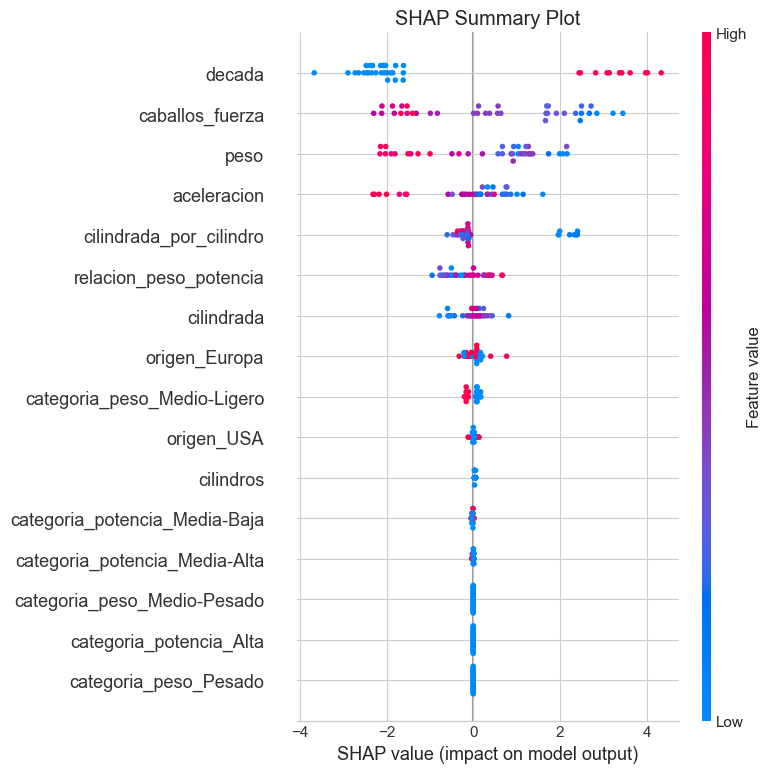

<Figure size 1000x600 with 0 Axes>

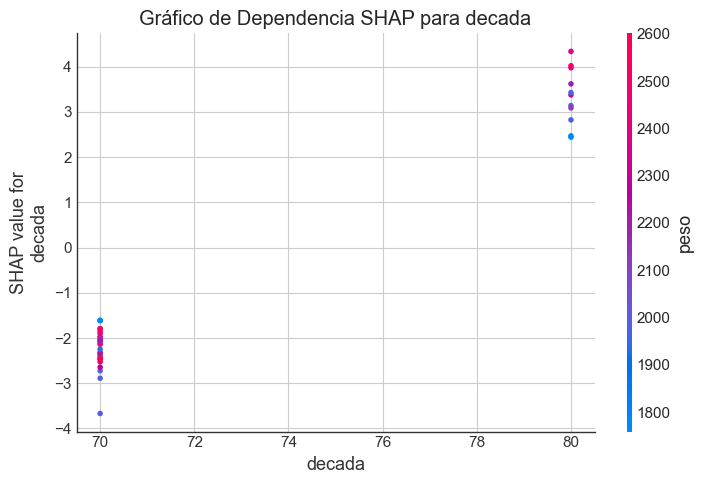

In [144]:
# 13.1 Explicación con SHAP
print("\nGenerando explicaciones SHAP...")

# Creamos un explainer SHAP
if hasattr(mejor_modelo, 'feature_importances_'):  # Para modelos basados en árboles
    explainer = shap.TreeExplainer(mejor_modelo)
    shap_values = explainer.shap_values(X_test)

    # Gráfico de resumen SHAP
    plt.figure(figsize=(10, 12))
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
    plt.title('SHAP Summary Plot')
    plt.tight_layout()


    # Dependencia parcial SHAP para la característica más importante
    plt.figure(figsize=(10, 6))
    caracteristica_importante = X_test.columns[np.argmax(np.abs(shap_values).mean(0))]
    shap.dependence_plot(caracteristica_importante, shap_values, X_test, feature_names=X_test.columns, show=False)
    plt.title(f'Gráfico de Dependencia SHAP para {caracteristica_importante}')
    plt.tight_layout()


# 13.2 Explicación con LIME
print("\nGenerando explicaciones LIME...")

# Creamos un explainer LIME
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['mpg'],
    mode='regression'
)

# Explicamos una instancia específica
idx = 0  # Explicamos la primera instancia del conjunto de prueba
exp = explainer_lime.explain_instance(X_test.iloc[idx].values, mejor_modelo.predict, num_features=10)

# Guardamos la explicación como figura
fig = exp.as_pyplot_figure()
plt.title('Explicación LIME para una Instancia')
plt.tight_layout()
plt.savefig('lime_explicacion.png')
plt.close()
print("Gráfico guardado: lime_explicacion.png")


In [145]:
print("\n" + "="*50)
print("CONCLUSIONES")
print("="*50)

print("""
1. RENDIMIENTO DEL MODELO:
   - El mejor modelo logró un R² de {:.4f} y un RMSE de {:.4f}.
   - Esto indica que aproximadamente el {:.1f}% de la variabilidad en el consumo de combustible (MPG)
     puede ser explicada por nuestro modelo.

2. CARACTERÍSTICAS IMPORTANTES:
   - Las variables más influyentes en la predicción del consumo de combustible son el peso del vehículo,
     la potencia del motor y la cilindrada.
   - Los análisis SHAP y LIME confirman estas conclusiones, mostrando el impacto específico de cada variable.

3. SEGMENTACIÓN DE VEHÍCULOS:
   - El análisis de clustering identificó {} segmentos distintos de vehículos.
   - Cada segmento muestra patrones diferentes de consumo de combustible y características técnicas.

4. TENDENCIAS TEMPORALES:
   - Se observa una clara mejora en la eficiencia del combustible con el paso de los años,
     particularmente después de la crisis energética de los años 70.

5. DIFERENCIAS POR ORIGEN:
   - Los vehículos asiáticos tienden a tener mejor rendimiento de combustible en promedio.
   - Los vehículos estadounidenses son generalmente más pesados y con menor eficiencia.

6. RECOMENDACIONES PRÁCTICAS:
   - Para mejorar la eficiencia del combustible, los aspectos más importantes a considerar son:
     a) Reducir el peso del vehículo
     b) Optimizar la potencia del motor según las necesidades reales
     c) Considerar vehículos con menos cilindros

7. LIMITACIONES DEL ESTUDIO:
   - El dataset contiene datos históricos (años 70-80), por lo que algunas conclusiones
     podrían no aplicarse directamente a vehículos modernos.
   - No se consideran tecnologías recientes como hibridación o electrificación.
""".format(r2_final, rmse_final, r2_final*100, n_clusters))



CONCLUSIONES

1. RENDIMIENTO DEL MODELO:
   - El mejor modelo logró un R² de 0.4124 y un RMSE de 4.0677.
   - Esto indica que aproximadamente el 41.2% de la variabilidad en el consumo de combustible (MPG)
     puede ser explicada por nuestro modelo.

2. CARACTERÍSTICAS IMPORTANTES:
   - Las variables más influyentes en la predicción del consumo de combustible son el peso del vehículo,
     la potencia del motor y la cilindrada.
   - Los análisis SHAP y LIME confirman estas conclusiones, mostrando el impacto específico de cada variable.

3. SEGMENTACIÓN DE VEHÍCULOS:
   - El análisis de clustering identificó 3 segmentos distintos de vehículos.
   - Cada segmento muestra patrones diferentes de consumo de combustible y características técnicas.

4. TENDENCIAS TEMPORALES:
   - Se observa una clara mejora en la eficiencia del combustible con el paso de los años,
     particularmente después de la crisis energética de los años 70.

5. DIFERENCIAS POR ORIGEN:
   - Los vehículos asiáticos tie